In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from abc import abstractmethod 
%matplotlib inline
from sklearn.metrics import accuracy_score

# Base layer for the neural network layers
class Layer:
    def __init__(self):
        self.layer_num = -1
        self.weights = None
        self.biases = None
        self.A_prev = None
        self.Z = None
        self.grad_A_prev = None
        self.grad_w = None
        self.grad_b = None
    
    @abstractmethod
    def forward(self):
        pass
    
    @abstractmethod
    def backward(self):
        pass

# Linear layer without activation, where the gradient is just a constant
class Linear(Layer):
    
    def linear(self, Z):
        return Z
    
    def linear_func(self, A_prev, W, b):
        intermediary = np.dot(W, A_prev)
#         print('Forward pass:')
#         print('Weight matrix shape: {}'.format(W.shape))
#         print('A_prev matrix shape: {}'.format(A_prev.shape))
        Z = np.dot(W, A_prev) + b
#         print('Z matrix shape: {}'.format(Z.shape))
        return Z

    def linear_gradient(self, dA, Z):
        A = self.sigmoid(Z)
        
        # The linear gradient is a just a constant (1)
        dZ = dA * 1
#         print('Current linear gradient derivative: {}'.format(1))
        return dZ
    
    def forward(self, A_prev, should_update=True):
        Z = self.linear_func(A_prev, self.weights, self.biases)
        A = self.linear(Z)
        if should_update:
            self.A_prev = A_prev
            self.Z = Z
        return A
    
    def grad_backward(self, dZ, A_prev, W, b):
        m = A_prev.shape[1]

        dW = (1 / m) * np.dot(dZ, A_prev.T)
        db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(W.T, dZ)

        assert dA_prev.shape == A_prev.shape
        assert dW.shape == W.shape
        assert db.shape == b.shape

        return dA_prev, dW, db

    def backward(self, dA):
        dZ = self.linear_gradient(dA, self.Z)
        dA_prev, dW, db = self.grad_backward(dZ, self.A_prev, self.weights, self.biases)
        self.grad_A_prev = dA_prev
        self.grad_w = dW
        self.grad_b = db
        
        return dA_prev, dW, db
    
# Sigmoid layer using sigmoid as an activation function.
class Sigmoid(Layer):
    
    def sigmoid(self, Z):
#         print('Shape of input to sigmoid: {}'.format(Z.shape))
        A = 1 / (1 + np.exp(-Z))
        return A
    
    def linear_func(self, A_prev, W, b):
        intermediary = np.dot(W, A_prev)
#         print('Forward pass:')
#         print('Weight matrix shape: {}'.format(W.shape))
#         print('A_prev matrix shape: {}'.format(A_prev.shape))
        Z = np.dot(W, A_prev) + b
#         print('Z matrix shape: {}'.format(Z.shape))
        return Z

    def sigmoid_gradient(self, dA, Z):
        A = self.sigmoid(Z)
        
        dZ = dA * A * (1 - A)
#         print('Current sigmoid gradient derivative: {}'.format(A * (1 - A)))
        return dZ
    
    def forward(self, A_prev, should_update=True):
        Z = self.linear_func(A_prev, self.weights, self.biases)
        A = self.sigmoid(Z)
        if should_update:
            self.A_prev = A_prev
            self.Z = Z
        return A
    
    def grad_backward(self, dZ, A_prev, W, b):
        m = A_prev.shape[1]

        dW = (1 / m) * np.dot(dZ, A_prev.T)
        db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(W.T, dZ)

        assert dA_prev.shape == A_prev.shape
        assert dW.shape == W.shape
        assert db.shape == b.shape

        return dA_prev, dW, db

    def backward(self, dA):
        dZ = self.sigmoid_gradient(dA, self.Z)
        dA_prev, dW, db = self.grad_backward(dZ, self.A_prev, self.weights, self.biases)
        self.grad_A_prev = dA_prev
        self.grad_w = dW
        self.grad_b = db
        
        return dA_prev, dW, db

# HyperbolicTangent layer using tanh as an activation function
class HyperbolicTangent(Layer):
    
    def tanh(self, Z):
        A = np.tanh(Z)
        return A
    
    def linear_func(self, A_prev, W, b):
        intermediary = np.dot(W, A_prev)
#         print('Forward pass:')
#         print('Weight matrix:')
#         print(W)
#         print('A_prev matrix:')
#         print(A_prev)
        Z = np.dot(W, A_prev) + b
#         print('Z matrix:')
#         print(Z)
        return Z

    def tanh_gradient(self, dA, Z):
        A = self.tanh(Z)
        
        dZ = dA * (1 - np.square(A))
#         print('Current tanh gradient derivative: {}'.format(1 - np.square(A)))
        return dZ
    
    def forward(self, A_prev, should_update=True):
        Z = self.linear_func(A_prev, self.weights, self.biases)
        A = self.tanh(Z)
        if should_update:
            self.A_prev = A_prev
            self.Z = Z
        return A
    
    def grad_backward(self, dZ, A_prev, W, b):
        m = A_prev.shape[1]

        dW = (1 / m) * np.dot(dZ, A_prev.T)
        db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(W.T, dZ)

        assert dA_prev.shape == A_prev.shape
        assert dW.shape == W.shape
        assert db.shape == b.shape

        return dA_prev, dW, db

    def backward(self, dA):
        dZ = self.tanh_gradient(dA, self.Z)
        dA_prev, dW, db = self.grad_backward(dZ, self.A_prev, self.weights, self.biases)
        self.grad_A_prev = dA_prev
        self.grad_w = dW
        self.grad_b = db
        
        return dA_prev, dW, db

# Softmax layer using softmax as an activation function
class Softmax(Layer):
    
    def softmax(self, Z):
#         print('Softmax input:')
#         print(Z)
        A = np.exp(Z) / np.sum(np.exp(Z), axis = 1, keepdims = True)
#         print('Softmax output:')
#         print(A)
        return A
    
    def linear_func(self, A_prev, W, b):
        intermediary = np.dot(W, A_prev)
#         print('Forward pass:')
#         print('Weight matrix shape: {}'.format(W.shape))
#         print('A_prev matrix shape: {}'.format(A_prev.shape))
        Z = np.dot(W, A_prev) + b
#         print('Z matrix shape: {}'.format(Z.shape))
        return Z

    # TODO: fix this
    def softmax_gradient(self, dA, Z):
        A = self.softmax(Z)
        
        dZ = dA * A * (1 - A)
#         print('Current softmax gradient derivative: {}'.format(A * (1 - A)))
        return dZ
    
    def forward(self, A_prev, should_update=True):
        Z = self.linear_func(A_prev, self.weights, self.biases)
        A = self.softmax(Z)
        if should_update:
            self.A_prev = A_prev
            self.Z = Z
        return A
    
    def grad_backward(self, dZ, A_prev, W, b):
        m = A_prev.shape[1]

        dW = (1 / m) * np.dot(dZ, A_prev.T)
        db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(W.T, dZ)

        assert dA_prev.shape == A_prev.shape
        assert dW.shape == W.shape
        assert db.shape == b.shape

        return dA_prev, dW, db

    def backward(self, dA):
        dZ = self.softmax_gradient(dA, self.Z)
        dA_prev, dW, db = self.grad_backward(dZ, self.A_prev, self.weights, self.biases)
        self.grad_A_prev = dA_prev
        self.grad_w = dW
        self.grad_b = db
        
        return dA_prev, dW, db

# CrossEntropy layer with no activation function used
class CrossEntropyLoss(Layer):
    
    def linear_func(self, A_prev, W, b):
        intermediary = np.dot(W, A_prev)
#         print('Forward pass:')
#         print('Weight matrix shape: {}'.format(W.shape))
#         print('A_prev matrix shape: {}'.format(A_prev.shape))
        Z = np.dot(W, A_prev) + b
#         print('Z matrix shape: {}'.format(Z.shape))
        return Z

        
    def compute_cost(self, AL, y):
        # compute cross entropy cost
        m = y.shape[1]              
        cost = - (1 / m) * np.sum(np.multiply(y, np.log(AL)) + np.multiply(1 - y, np.log(1 - AL)))
        return cost 

    def linear_gradient(self, dA, Z):
        A = self.sigmoid(Z)
        
        # The linear gradient is a just a constant (1)
        dZ = dA * 1
#         print('Current linear gradient derivative: {}'.format(1))
        return dZ
    
    def forward(self, A_prev, should_update=True):
        Z = self.linear_func(A_prev, self.weights, self.biases)
        A = Z
        if should_update:
            self.A_prev = A_prev
            self.Z = Z
        return A
    
    def grad_backward(self, dZ, A_prev, W, b):
        m = A_prev.shape[1]

        dW = (1 / m) * np.dot(dZ, A_prev.T)
        db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(W.T, dZ)

        assert dA_prev.shape == A_prev.shape
        assert dW.shape == W.shape
        assert db.shape == b.shape

        return dA_prev, dW, db

    def backward(self, dA):
        dZ = self.softmax_gradient(dA, self.Z)
        dA_prev, dW, db = self.grad_backward(dZ, self.A_prev, self.weights, self.biases)
        self.grad_A_prev = dA_prev
        self.grad_w = dW
        self.grad_b = db
        
        return dA_prev, dW, db

# Sequential class that encapsulates all the layers and acts as the neural network training class 
class Sequential:
    def __init__(self):
        self.list_layers = []
        self.activation_function = ''
        self.model_name = ''
        self.distribution = ''
        
    def init_layers(self, layer_depths, distribution='standard_normal'):
        '''
        Takes as an input -> [inputLayer, layer1, layer2, outputlayer] as the dimensions.
        The weights for the current layer are initialized as the weight from each connection
        in the previous layer to the current layer & the same goes for the biases.
        '''
        np.random.seed(5)
        for index in range(1, len(layer_depths)):
            current_layer = ''
            if self.activation_function == 'sigmoid':
                current_layer = Sigmoid()
            elif self.activation_function == 'tanh':
                current_layer = HyperbolicTangent()
            else:
                raise Exception('Invalid activation function: {} not supported'.format(activation_function))
            # TODO: this property can be deprecated
            current_layer.layer_num = index
            # distribution for the weights
            if distribution == 'standard_normal':
                current_layer.weights = np.random.randn(layer_depths[index], layer_depths[index - 1]) * 0.01
            elif distribution == 'zeros':
                current_layer.weights = np.zeros((layer_depths[index], layer_depths[index - 1]))
            elif distribution == 'tens':
                current_layer.weights = np.random.uniform(-10, 10, (layer_depths[index], layer_depths[index - 1]))
            current_layer.biases = np.zeros((layer_depths[index], 1))
#             print('Current layer index')
#             print(current_layer.layer_num)
#             print('Current layer weights')
#             print(current_layer.weights)
#             print('Current layer biases')
#             print(current_layer.biases)
            self.list_layers.append(current_layer)
    
    def save_to_file(self, name_of_file):
        data = {'ModelActivation': self.activation_function,
        'layers': [
            {
                'layer_num': i.layer_num,
                'weights': i.weights,
                'biases': i.biases,
                'A_prev': i.A_prev,
                'Z': i.Z,
                'grad_A_prev': i.grad_A_prev,
                'grad_w': i.grad_w,
                'grad_b': i.grad_b
            } for i in self.list_layers
        ]}
        np.save(name_of_file, data)
    
    def load_from_file(self, name_of_file):
        with open(name_of_file, 'r') as fp:
            data = np.load(fp)
            self.activation_function = data['ModelActivation']
            self.list_layers = []
            for layer in data['layers']:
                current_layer = ''
                if self.activation_function == 'sigmoid':
                    current_layer = Sigmoid()
                elif self.activation_function == 'tanh':
                    current_layer = HyperbolicTangent()
                else:
                    raise Exception('Invalid activation function: {} not supported'.format(activation_function))
                current_layer.layer_num = layer.layer_num
                current_layer.weight = layer.weights
                current_layer.biases = layer.biases
                current_layer.A_prev = layer.A_prev
                current_layer.Z = layer.Z
                current_layer.grad_A_prev = layer.grad_A_prev
                current_layer.grad_w = layer.grad_w
                current_layer.grad_b = layer.grad_b
                self.list_layers.append(current_layer)

    def model_forward_pass(self, X, should_update):
        A = X
        
        for layer in self.list_layers:
            A_prev = A
            A = layer.forward(A_prev, should_update)
        
#         print('A.shape: {}'.format(A.shape))
#         print('X.shape: {}'.format(X.shape))
#         assert A.shape == (1, X.shape[1])

        return A
    
    def model_backward_pass(self, AL, y):
        y = y.reshape(AL.shape)
        L = len(self.list_layers)
                
        # using cross entropy loss as cost & taking derivative of cost w.r.t. AL
#         print('Backward pass')
#         print('Current AL:')
#         print(AL)
#         print('Y:')
#         print(y)
#         print('Current AL - y')
#         print(AL - y)
#         print('Current dAL:')
        dAL = np.divide(AL - y, np.multiply(AL, 1 - AL))
        # hack to convert NANs to 0s - maybe needed only for tanh ?
        dAL[np.isnan(dAL)] = 0
#         print(dAL)
        last_layer = self.list_layers[-1]
        grad_A_prev, grad_w, grad_b = last_layer.backward(dAL)
#         print('grad_A_prev:')
#         print(grad_A_prev)
#         print('grad_w:')
#         print(grad_w)
#         print('grad_b:')
#         print(grad_b)

        for layer in self.list_layers[L-2::-1]:
            grad_A_prev, grad_w, grad_b = layer.backward(grad_A_prev)
#             print('grad_A_prev:')
#             print(grad_A_prev)
#             print('grad_w:')
#             print(grad_w)
#             print('grad_b:')
#             print(grad_b)

    def update_parameters(self, learning_rate):        
        for layer in self.list_layers:
            layer.weights = layer.weights - learning_rate * layer.grad_w
            layer.biases = layer.biases - learning_rate * layer.grad_b
        
    def compute_cost(self, AL, y):
        # compute cross entropy cost
        m = y.shape[1]              
        cost = - (1 / m) * np.sum(np.multiply(y, np.log(AL)) + np.multiply(1 - y, np.log(1 - AL)))
        return cost
        
    def fit(self, X, y, layer_depths, model_name, learning_rate=0.01, epochs=3000, activation_function='sigmoid', distribution='standard_normal'):
        np.random.seed(5)

        self.activation_function = activation_function
        self.init_layers(layer_depths, distribution=distribution)
        
        # intialize cost list
        cost_list = []

        # iterate over num_iterations
        for epoch in range(epochs):
#             print('\n\nEpoch number: {}'.format(epoch))
            activation_last_layer = self.model_forward_pass(X, should_update=True)

            # compute cost to plot it
            cost = self.compute_cost(activation_last_layer, y)
            cost_list.append(cost)

#             print('Activation layer shape')
#             print(activation_last_layer.shape)
            self.model_backward_pass(activation_last_layer, y)
            self.update_parameters(learning_rate)
#             print('Updated weights')
#             for layer in self.list_layers:
#                 print(layer.weights)
            if epoch != 0 and epoch % 50 == 0:
                print('Completed {} epochs'.format(epoch))
            
        # plot the cost curve
        plt.figure(figsize=(10, 6))
        plt.plot(cost_list)
        plt.xlabel("Iterations (per hundreds)")
        plt.ylabel("Loss")
        plt.title(f"Model: {model_name}     Plot: Loss curve for the learning rate = {learning_rate}")
    
    def predict(self, X):
        y_pred_prob = self.model_forward_pass(X, should_update=False)
        # assume hot encoding if the number of rows > 1
#         print(y_pred_prob)
        if y_pred_prob.shape[0] > 1:
            y_pred_prob_hot_encoded = np.zeros(y_pred_prob.shape)  # our zeros and ones will go here
            y_pred_prob_hot_encoded[np.argmax(y_pred_prob, axis=0), np.arange(y_pred_prob.shape[1])] = 1
#             print(y_pred_prob_hot_encoded)
            return y_pred_prob_hot_encoded
        else:
#             print(y_pred_prob)
            y_pred = (y_pred_prob >= 0.5) * 1
            return y_pred


[[0 0 1 1]]
Accuracy is : 0.5


C:\Users\pravu\AppData\Local\Temp\ipykernel_11804\1478151843.py:437: RuntimeWarning: divide by zero encountered in log
  cost = - (1 / m) * np.sum(np.multiply(y, np.log(AL)) + np.multiply(1 - y, np.log(1 - AL)))
C:\Users\pravu\AppData\Local\Temp\ipykernel_11804\1478151843.py:437: RuntimeWarning: invalid value encountered in log
  cost = - (1 / m) * np.sum(np.multiply(y, np.log(AL)) + np.multiply(1 - y, np.log(1 - AL)))
C:\Users\pravu\AppData\Local\Temp\ipykernel_11804\1478151843.py:437: RuntimeWarning: invalid value encountered in multiply
  cost = - (1 / m) * np.sum(np.multiply(y, np.log(AL)) + np.multiply(1 - y, np.log(1 - AL)))
C:\Users\pravu\AppData\Local\Temp\ipykernel_11804\1478151843.py:407: RuntimeWarning: invalid value encountered in divide
  dAL = np.divide(AL - y, np.multiply(AL, 1 - AL))


[[0 0 0 0]]
Accuracy is : 0.5


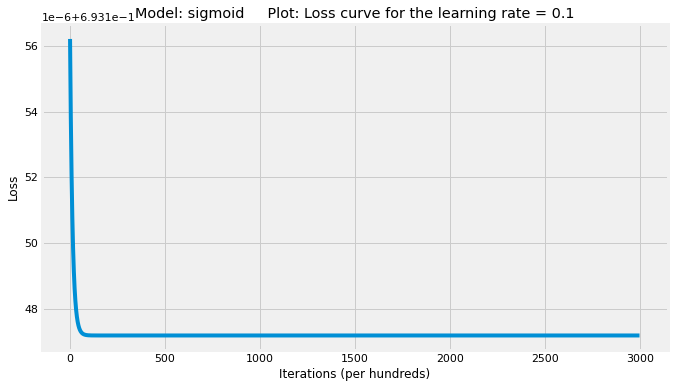

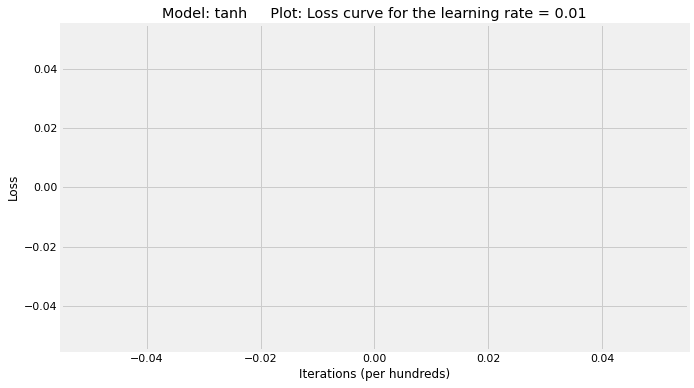

In [334]:
# use sigmoid & hyperbolic tangent function for testing (part 1)

X_train = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
y_train = np.array([[0, 1, 1, 0]])
X_test = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
y_test = np.array([[0, 1, 1, 0]])

# # Setting layers dims
layer_depths = [X_train.shape[0], 2, 1]

sigmoid_neural_network = Sequential()
sigmoid_neural_network.fit(X_train, y_train, layer_depths, 'sigmoid', learning_rate=0.1, epochs=3000, activation_function='sigmoid')
y_pred = sigmoid_neural_network.predict(X_test)
print(y_pred)

print('Accuracy is : {}'.format(accuracy_score(y_test.T, y_pred.T)))

# TODO: tanh encountering divide by 0 when plotting loss
tanh_neural_network = Sequential()
tanh_neural_network.fit(X_train, y_train, layer_depths, 'tanh', learning_rate=0.01, epochs=3000, activation_function='tanh')
y_pred = tanh_neural_network.predict(X_test)
print(y_pred)

print('Accuracy is : {}'.format(accuracy_score(y_test.T, y_pred.T)))

Accuracy for OR gate is : 1.0
Accuracy for NAND gate is : 1.0
Accuracy for AND gate is : 1.0
Accuracy for XOR gate is : 1.0


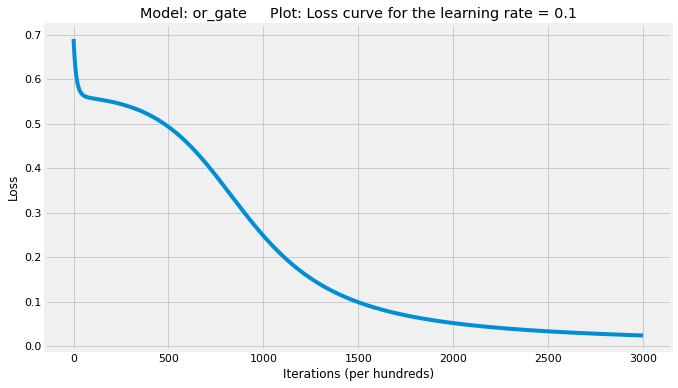

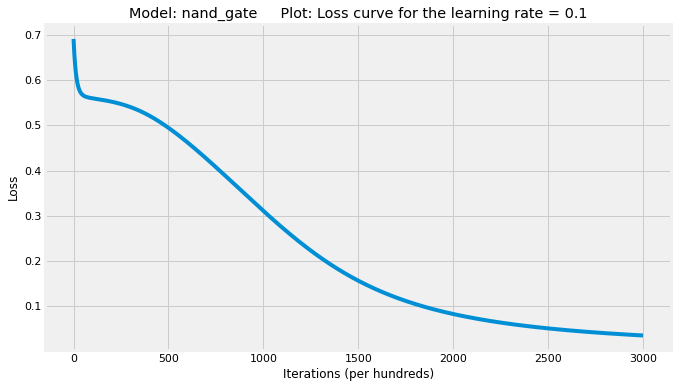

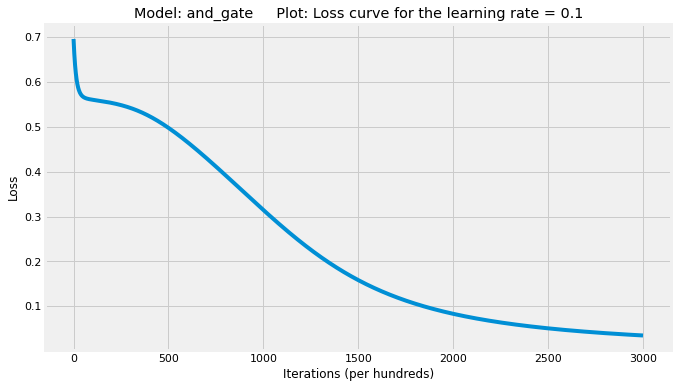

In [338]:
# use sigmoid & hyperbolic tangent function for testing (part 1)

# first create OR gate
X_train = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
y_train = np.array([[0, 1, 1, 1]])
X_test = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
y_test = np.array([[0, 1, 1, 1]])
layer_depths = [X_train.shape[0], 2, 1]
or_neural_network = Sequential()
or_neural_network.fit(X_train, y_train, layer_depths, 'or_gate', learning_rate=0.1, epochs=3000, activation_function='sigmoid')
y_pred_or = or_neural_network.predict(X_test)
# print(y_pred_or)
print('Accuracy for OR gate is : {}'.format(accuracy_score(y_test.T, y_pred_or.T)))

# then create NAND gate
X_train = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
y_train = np.array([[1, 1, 1, 0]])
X_test = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
y_test = np.array([[1, 1, 1, 0]])
layer_depths = [X_train.shape[0], 2, 1]
nand_neural_network = Sequential()
nand_neural_network.fit(X_train, y_train, layer_depths, 'nand_gate', learning_rate=0.1, epochs=3000, activation_function='sigmoid')
y_pred_nand = nand_neural_network.predict(X_test)
# print(y_pred_nand)
print('Accuracy for NAND gate is : {}'.format(accuracy_score(y_test.T, y_pred_nand.T)))

# now train AND gate
X_train = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
y_train = np.array([[0, 0, 0, 1]])
X_test = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
y_test = np.array([[0, 0, 0, 1]])
layer_depths = [X_train.shape[0], 2, 1]
and_neural_network = Sequential()
and_neural_network.fit(X_train, y_train, layer_depths, 'and_gate', learning_rate=0.1, epochs=3000, activation_function='sigmoid')
y_pred_and = and_neural_network.predict(X_test)
# print(y_pred_and)
print('Accuracy for AND gate is : {}'.format(accuracy_score(y_test.T, y_pred_and.T)))

# combine the outputs by chaining them to create a XOR gate
X_test = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
y_test = np.array([[0, 1, 1, 0]])
y_pred_or = or_neural_network.predict(X_test)
y_pred_nand = nand_neural_network.predict(X_test)
y_concat_or_nand = np.concatenate((y_pred_or, y_pred_nand), axis=0)
y_pred_xor = and_neural_network.predict(y_concat_or_nand)
# print(y_pred_nand)
print('Accuracy for XOR gate is : {}'.format(accuracy_score(y_test.T, y_pred_xor.T)))

or_neural_network.save_to_file('C:/Pravallika/UTA/Summer 2022/Machine Learning/Assignment 2/XOR_solved.or.w')
nand_neural_network.save_to_file('C:/Pravallika/UTA/Summer 2022/Machine Learning/Assignment 2/XOR_solved.nand.w')
and_neural_network.save_to_file('C:/Pravallika/UTA/Summer 2022/Machine Learning/Assignment 2/XOR_solved.and.w')

(784, 60000)
Accuracy is : 0.1135


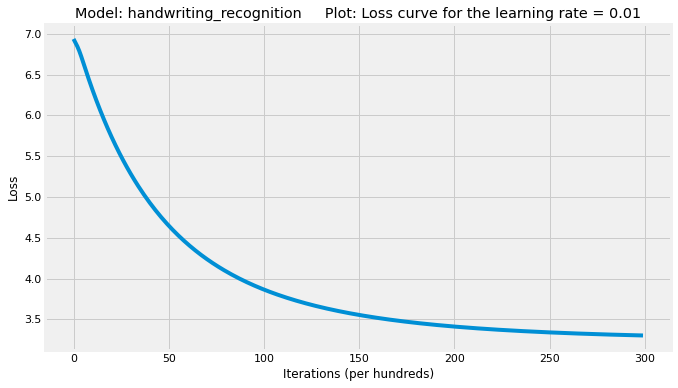

In [340]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train_rows = X_train.shape[0]
y_train_rows = y_train.shape[0]
X_test_rows = X_test.shape[0]
y_test_rows = y_test.shape[0]

X_train = X_train.reshape(X_train_rows, -1).T
y_train = y_train.reshape(y_train_rows, -1).T
# since we know this is a handwriting recognition problem, try creating the onehot encoded matrix with 10 rows
flat_y_train = y_train.ravel()
y_train_hot_encoded = np.zeros((flat_y_train.size, 10))
y_train_hot_encoded[np.arange(flat_y_train.size), flat_y_train] = 1
y_train_hot_encoded = y_train_hot_encoded.T

X_test = X_test.reshape(X_test_rows, -1).T
y_test = y_test.reshape(y_test_rows, -1).T
flat_y_test = y_test.ravel()
y_test_hot_encoded = np.zeros((flat_y_test.size, 10))
y_test_hot_encoded[np.arange(flat_y_test.size), flat_y_test] = 1
y_test_hot_encoded = y_test_hot_encoded.T

print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

# # Setting layers dims
layer_depths = [X_train.shape[0], 5, 10]

sigmoid_neural_network = Sequential()
sigmoid_neural_network.fit(X_train, y_train_hot_encoded, layer_depths, 'handwriting_recognition', learning_rate=0.01, epochs=300, activation_function='sigmoid')
y_pred_hot_encoded = sigmoid_neural_network.predict(X_test)
# print(y_pred)

print('Accuracy is : {}'.format(accuracy_score(y_test_hot_encoded.T, y_pred_hot_encoded.T)))

Completed 50 epochs
Completed 100 epochs
Completed 150 epochs
Completed 200 epochs
Completed 250 epochs
Accuracy is : 0.1135


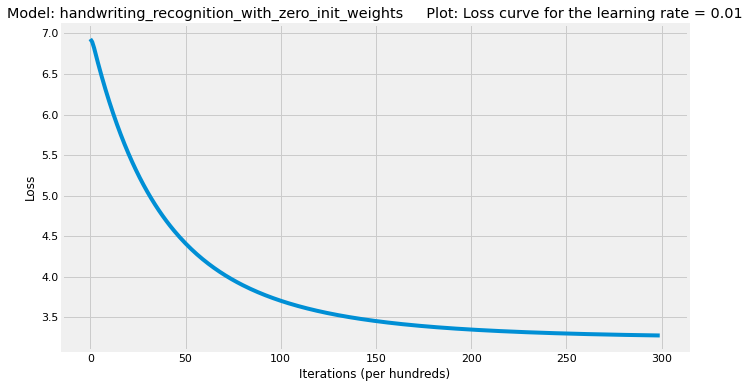

In [363]:
sigmoid_zeros_neural_network = Sequential()
sigmoid_zeros_neural_network.fit(X_train, y_train_hot_encoded, layer_depths, 'handwriting_recognition_with_zero_init_weights', learning_rate=0.01, epochs=300, activation_function='sigmoid', distribution='zeros')
y_pred_hot_encoded = sigmoid_zeros_neural_network.predict(X_test)
# print(y_pred)

print('Accuracy is : {}'.format(accuracy_score(y_test_hot_encoded.T, y_pred_hot_encoded.T)))

C:\Users\pravu\AppData\Local\Temp\ipykernel_11804\2009765627.py:87: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))


Completed 50 epochs
Completed 100 epochs
Completed 150 epochs
Completed 200 epochs
Completed 250 epochs
Accuracy is : 0.091


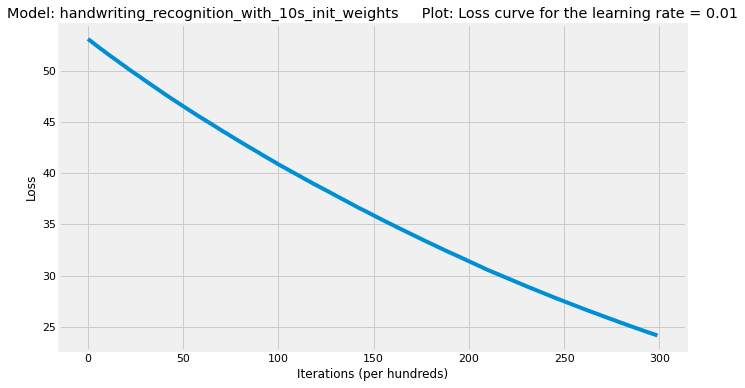

In [362]:
sigmoid_tens_neural_network = Sequential()
sigmoid_tens_neural_network.fit(X_train, y_train_hot_encoded, layer_depths, 'handwriting_recognition_with_10s_init_weights', learning_rate=0.01, epochs=300, activation_function='sigmoid', distribution='tens')
y_pred_hot_encoded = sigmoid_tens_neural_network.predict(X_test)
# print(y_pred)

print('Accuracy is : {}'.format(accuracy_score(y_test_hot_encoded.T, y_pred_hot_encoded.T)))

C:\Users\pravu\AppData\Local\Temp\ipykernel_11804\2009765627.py:87: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))


Completed 50 epochs
Completed 100 epochs
Completed 150 epochs
Completed 200 epochs
Completed 250 epochs
Accuracy is : 0.1135


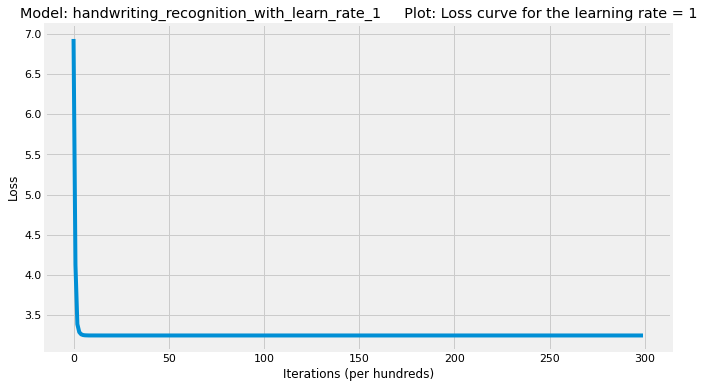

In [360]:
sigmoid_learn1_neural_network = Sequential()
sigmoid_learn1_neural_network.fit(X_train, y_train_hot_encoded, layer_depths, 'handwriting_recognition_with_learn_rate_1', learning_rate=1, epochs=300, activation_function='sigmoid')
y_pred_hot_encoded = sigmoid_learn1_neural_network.predict(X_test)
# print(y_pred)

print('Accuracy is : {}'.format(accuracy_score(y_test_hot_encoded.T, y_pred_hot_encoded.T)))

Completed 50 epochs
Completed 100 epochs
Completed 150 epochs
Completed 200 epochs
Completed 250 epochs
Accuracy is : 0.0973


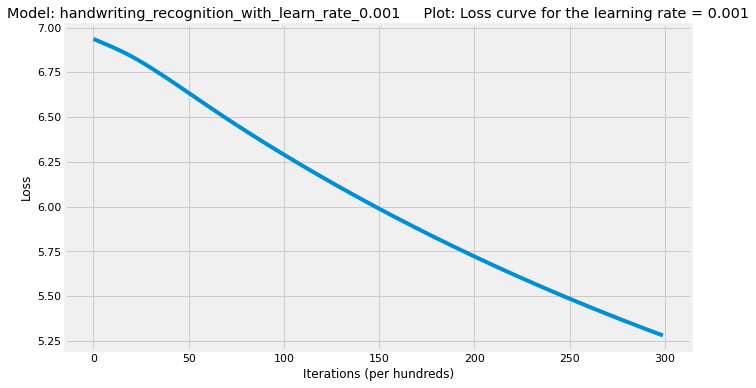

In [361]:
sigmoid_learn_small_neural_network = Sequential()
sigmoid_learn_small_neural_network.fit(X_train, y_train_hot_encoded, layer_depths, 'handwriting_recognition_with_learn_rate_0.001', learning_rate=0.001, epochs=300, activation_function='sigmoid')
y_pred_hot_encoded = sigmoid_learn_small_neural_network.predict(X_test)
# print(y_pred)

print('Accuracy is : {}'.format(accuracy_score(y_test_hot_encoded.T, y_pred_hot_encoded.T)))